In [ ]:
# Trying to perform clustering on twitter data that is scraped from the website

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TwitterData.csv')

In [3]:
df.head()

,S no.,user_name,text,favourite_count,retweet_count,created_at,followers_count,friends_count,location,total_tweets
0,1,LisaHar95997355,RT @Nenagh9: Free the lone Borneo elephant Che...,0,42,30-10-2022 23:59,786,1666,Oop north west,39344
1,2,Bandinellosaul,RT @60Minutes: “It just seemed like everyone w...,0,12,30-10-2022 23:59,317,1553,NaN,75418
2,3,DuchessFayte,RT @namchanhyung: Btw pls be understanding &am...,0,129,30-10-2022 23:59,206,210,blinkcity | stayville | rcbyf,3120
3,4,porcherrrr,RT @ForwardCYM: 🚨 BREAKING NEWS: #Lula da Silv...,0,246,30-10-2022 23:59,195,471,loguetown,13843
4,5,IONNAPEE,RT @nytimes: Breaking News: Brazil has ousted ...,0,10727,30-10-2022 23:59,7111,1602,são paulo,98622


In [15]:
### Vocabulary size
voc_size=5000

In [16]:
user_name = df.user_name

In [17]:
text = df.text

In [18]:
df1 = df[['user_name', 'text']]

In [19]:
df1

,user_name,text
0,LisaHar95997355,RT @Nenagh9: Free the lone Borneo elephant Che...
1,Bandinellosaul,RT @60Minutes: “It just seemed like everyone w...
2,DuchessFayte,RT @namchanhyung: Btw pls be understanding &am...
3,porcherrrr,RT @ForwardCYM: 🚨 BREAKING NEWS: #Lula da Silv...
4,IONNAPEE,RT @nytimes: Breaking News: Brazil has ousted ...
...,...,...
12495,debbieharris1,"RT @laurenboebert: Lol. Sandy, your socialist ..."
12496,TemmyAFC,RT @CaptainArinze: The day my daughter was rus...
12497,EverMama8,RT @business: Canadian stocks were trading nor...
12498,davidpremier,Microsoft invests in Korean web3 &amp; blockch...


In [20]:
df1.isnull().sum()

user_name    0
text         0
dtype: int64

In [21]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kalyani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:

ps = PorterStemmer()
corpus = []
for i in range(0, len(df1)):
    review = re.sub('[^a-zA-Z]', ' ', df1['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
corpus

['rt nenagh free lone borneo eleph chendra oregon zoo sanctuari suffer zoo relat diseas conditi',
 'rt minut seem like everyon listen radio day went somebodi opportun someon hav',
 'rt namchanhyung btw pl understand amp respect chan chan room today follow tragic event itaweon last night',
 'rt forwardcym break news lula da silva presidenti race brazil defeat far right incumb jair bolsonaro',
 'rt nytim break news brazil oust presid jair bolsonaro rebuk far right incumb elect luiz cio lula da',
 'rt busi banker bring net zero messag africa risk sound place wail bagpip egyptian souq http',
 'rt gbnew mark dolan take tomorrow paper tonight daili mail petrol bomber attack migrant centr sunak u',
 'rt afp istanbul base centr coordin logist ukrain grain deal said sunday vessel',
 'top stori elon first big move pay remain verifi twitter http co p vcsx fp see http co irgzpompak',
 'rt furrincrypto hour rt amp follow fantom univ p e space news lead fl news smartliquid',
 'dlekur markc anderson 

In [24]:
corpus[1]

'rt minut seem like everyon listen radio day went somebodi opportun someon hav'

In [25]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[1071,
  3796,
  798,
  1576,
  2009,
  1457,
  3870,
  2335,
  3879,
  4631,
  105,
  3879,
  1872,
  3397,
  1447],
 [1071, 653, 2838, 695, 4859, 3291, 3170, 3415, 2603, 1052, 431, 4350, 4853],
 [1071,
  4149,
  4322,
  4148,
  340,
  656,
  2257,
  1509,
  1509,
  878,
  3873,
  3538,
  216,
  1828,
  1733,
  961,
  2587],
 [1071,
  3585,
  1110,
  4250,
  954,
  278,
  18,
  958,
  1458,
  3475,
  213,
  1568,
  4592,
  3396,
  416,
  2084],
 [1071,
  2922,
  1110,
  4250,
  3475,
  4418,
  330,
  416,
  2084,
  653,
  1568,
  4592,
  3396,
  1787,
  2345,
  1390,
  954,
  278],
 [1071,
  4343,
  3812,
  4472,
  1609,
  671,
  2955,
  4604,
  4390,
  4856,
  2604,
  2868,
  723,
  3643,
  1846,
  1813],
 [1071,
  2513,
  1916,
  3851,
  2584,
  157,
  2641,
  3850,
  981,
  2235,
  2767,
  550,
  1740,
  3562,
  1846,
  3562,
  2508],
 [1071, 2441, 641, 4116, 1846, 1226, 4459, 516, 4810, 3908, 4680, 4201, 4942],
 [153,
  2861,
  1746,
  1071,
  2366,
  4356,
  3098,
  2616,
  4062

In [26]:
#Embedding Representation
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[1071 3796  798 ...    0    0    0]
 [1071  653 2838 ...    0    0    0]
 [1071 4149 4322 ...    0    0    0]
 ...
 [1071 4343 4665 ...    0    0    0]
 [1359 2578 1573 ...    0    0    0]
 [1071 3717 4674 ...    0    0    0]]


In [27]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# Applying k-means for diffrent value of k and storing the WCSS

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(embedded_docs)
    wcss.append(kmeans.inertia_)

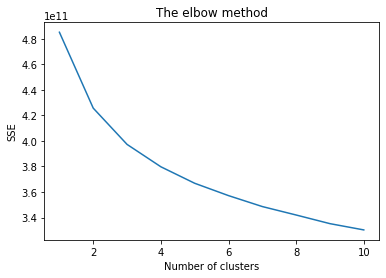

In [30]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')      #within cluster sum of squares
plt.show()

In [33]:
#Imporing the Library
from sklearn.cluster import KMeans
# Intialization
kmeans = KMeans(n_clusters = 4, init = 'random', max_iter = 300, n_init = 10, random_state = 0) 
#Applying Clustering
y_kmeans = kmeans.fit_predict(embedded_docs)

In [34]:
y_kmeans = pd.DataFrame(y_kmeans)

In [35]:
y_kmeans[0].nunique()

4

In [36]:
y_kmeans[0].unique()

array([0, 3, 1, 2])

In [37]:
y_kmeans[0].value_counts()

0    3924
3    3673
1    2911
2    1992
Name: 0, dtype: int64